In [1]:
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
def show_values_on_bars(axs, decimals=0):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            pattern = f'{{:.{decimals}f}}'
            value = pattern.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [64]:
df = pd.read_csv('./mpix_survey_03_15.csv')
# drop header rows
df = df[2:]

In [4]:
# only completed survey results
df = df[df.Finished == 'True']
print(len(df), 'completed responses')

229 completed responses


Not to worry...the names and email addresses are in the csv, but fail to parse due to lack of quotes

In [5]:
respondents = df[['Q22', 'Q23']]
respondents.to_csv(r'respondents.csv', index = False)

In [6]:
# !pip install shapely
# !pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import numpy as np

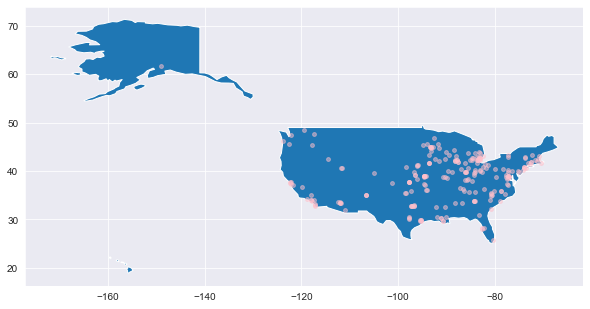

In [7]:
coords = df[['LocationLongitude', 'LocationLatitude']].astype(np.float64)
geometry = [Point(xy) for xy in zip(coords['LocationLongitude'], coords['LocationLatitude'])]
gdf = GeoDataFrame(coords, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.name == 'United States of America']
gdf.plot(ax=ax.plot(figsize=(10, 6)), marker='o', color='pink', markersize=15, alpha=0.5);

In [8]:
df.drop(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage'], axis=1, inplace=True)

In [9]:
questions ={
    'Q1': 'Have you ever made purchases with Mpix before?',
    'Q2': 'Have you created/purchased a photobook before?', 
    'Q3': 'How often do you create photobooks?', 
    'Q4' : 'Which of these sites have you utilized in making it?',
    'Q4_6_TEXT': 'manual responses',
    'Q6': 'What is your preferred size of a photobook?',
    'Q8': 'If you made a photobook, what would you do with it?',
    'Q9': 'For page customization, which of the following options do you prefer the most?',
    'Q10': 'In your view, how many photos belong on a single page?',
    'Q11': 'Which features might you want in creating a photo book',
    'Q12': 'For what occasions would you most likely purchase a photobook?',
    'Q15': 'Do you host any photos on any cloud storage sites?',
    'Q16': 'Would you use integrations with your cloud storage site?',
    'Q17': 'Do you have any privacy concerns regarding uploading photos?'
}

# Q1 - Have you ever made purchases with Mpix before?

In [10]:
responses = df.Q1.value_counts().to_frame('responses')
responses

,responses
Yes,206
No,23


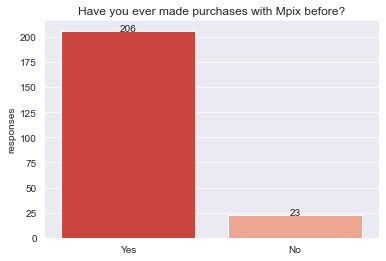

In [11]:
ax = sns.barplot(
    y='responses',
    x=responses.index,
    data=responses,
    orient='v',
    palette="Reds_r"
)
ax.set_title(questions['Q1'])

show_values_on_bars(ax)

# Q2 - Have you created/purchased a photobook before?

In [12]:
interest = df.Q2.value_counts().to_frame('interest')
interest

,interest
Yes and it was with another website,104
"No, but I am interested in making one",62
"Yes, I have made one with Mpix",56
"No, and I am NOT interested in photobooks (exit survey)",7


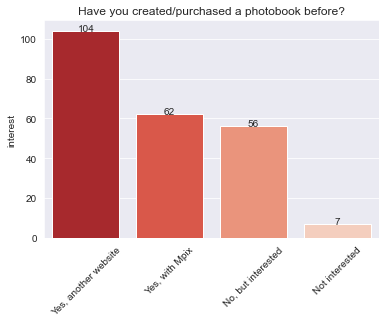

In [13]:
ax = sns.barplot(
    y='interest',
    x=interest.index,
    data=interest,
    orient='v',
    palette="Reds_r",
)
ax.set_title(questions['Q2'])
ax.set_xticklabels([
    'Yes, another website',
    'Yes, with Mpix',
    'No, but interested',
    'Not interested'
], rotation=45)

show_values_on_bars(ax)


In [14]:
interested = df[df.Q2 != 'No, and I am NOT interested in photobooks (exit survey)'].copy()
len(interested)

222

# Q3 - How often do you create photobooks?

In [15]:
frequency = df.Q3.value_counts().to_frame('frequency')
frequency

,frequency
I do not follow a schedule,111
Once a year,43
Once a month,5
Once a week,1


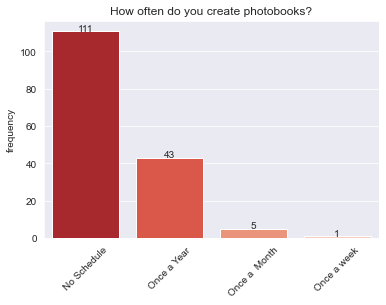

In [16]:
# ax = sns.barplot(x='frequency', y=frequency.index, data=frequency, orient='h')

ax = sns.barplot(
    y='frequency',
    x=frequency.index,
    data=frequency,
    orient='v',
    palette="Reds_r",
)
ax.set_title(questions['Q3'])
ax.set_xticklabels([
    'No Schedule',
    'Once a Year',
    'Once a  Month',
    'Once a week'
], rotation=45)

show_values_on_bars(ax)

# Q4 - If you have made a photobook before, which of these sites have you utilized in making it?

In [17]:
interested.Q4 = interested.Q4.str.replace(': \(please explain\)', '')

In [18]:
sites = ['Shutterfly', 'Mpix', 'Snapfish', 'Blurb', 'Walmart', 'Other']
results = {}
for site in sites:
    results[site] = len(interested[interested['Q4'].str.contains(site, na=False)])
    
site_use = pd.DataFrame(results.items(), columns=["name", "count"])
site_use

,name,count
0,Shutterfly,117
1,Mpix,52
2,Snapfish,27
3,Blurb,14
4,Walmart,2
5,Other,39


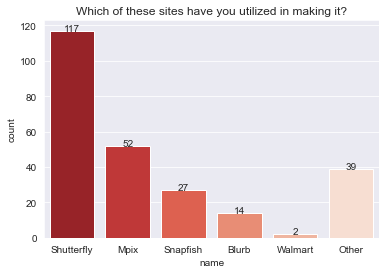

In [19]:
ax = sns.barplot(
    y='count',
    x='name',
    data=site_use,
    orient='v',
    palette="Reds_r",
)
ax.set_title(questions['Q4'])
# ax.set_xticklabels([
#     'No Schedule',
#     'Once a Year',
#     'Once a  Month',
#     'Once a week'
# ], rotation=45)

show_values_on_bars(ax)

In [20]:
print(interested.Q4_6_TEXT.unique())

[nan 'I ordered them through my photographer. I think she used Miller’s. '
 'Walgreens ' 'Chatbooks' 'Artifact uprising'
 'Printique, Canva, MyPublisher, Chatbooks' 'Printique and Chatbooks '
 'WHCC ' 'costco' 'Walgreens' 'Professional photographer'
 'Mixbook, Adorama' 'MixBook' 'Winkflash' 'Apple’s old version in iPhoto '
 'PastBook' 'Adorama ' 'Apple' 'MyPublisher' 'Artifact uprising '
 'Google Photos' 'Artifact Uprising ' 'Mixbook' 'and artifact uprising '
 'Millers' 'Miller’s ' 'ChatBooks ' 'Apple iPhotos and Artifact Uprising'
 'Colorland' 'Local store' 'Zno ']


# Q5 - How would you rate the importance of the following physical features of a photobook?

In [21]:
Q5 = interested[['Q5_1', 'Q5_2', 'Q5_3', 'Q5_4', 'Q5_5', 'Q5_6']].rename(columns={
    'Q5_1': 'Book bindings',
    'Q5_2': 'Custom book cover',
    'Q5_3': 'Photo page layout',
    'Q5_4': 'Paper material',
    'Q5_5': 'Photo print material',
    'Q5_6': 'special themes/templates',
})

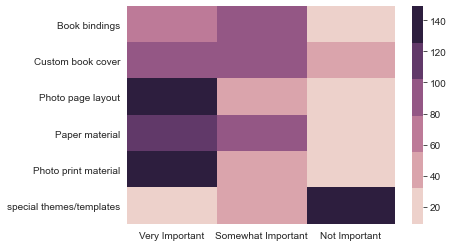

In [22]:
counts = Q5.apply(pd.Series.value_counts).T
ax = sns.heatmap(counts, cmap=sns.cubehelix_palette())
ax.invert_xaxis()

# Q6 - What is your preferred size of a photobook?

In [23]:
size = interested.Q6.value_counts().to_frame('votes')
size

,votes
"I may prefer a variety of sizes, no special preference",93
Medium ( 6-10 inches ),86
Large ( more than 10 inches ),41
Small ( less than 6 inches ),2


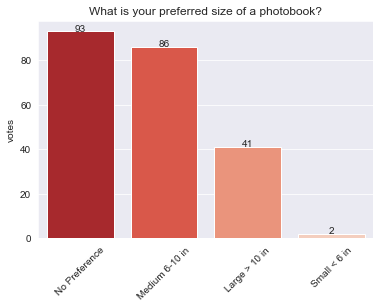

In [24]:

ax = sns.barplot(
    x=size.index,
    y='votes',
    data=size,
#     orient='v',
    palette="Reds_r",
)
ax.set_title(questions['Q6'])
ax.set_xticklabels([
    'No Preference',
    'Medium 6-10 in',
    'Large > 10 in',
    'Small < 6 in'
], rotation=45)

show_values_on_bars(ax)

# Q7 - Which of the following factors would most impact your choice of platform/vendor for photo books? 

In [25]:
Q7 = interested[['Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5']].dropna().rename(columns={
    'Q7_1': 'Price',
    'Q7_2': 'Photo Print Quality',
    'Q7_3': 'More customizable features',
    'Q7_4': 'Page template ease of use',
    'Q7_5': 'Photo Managment Utilities'
})

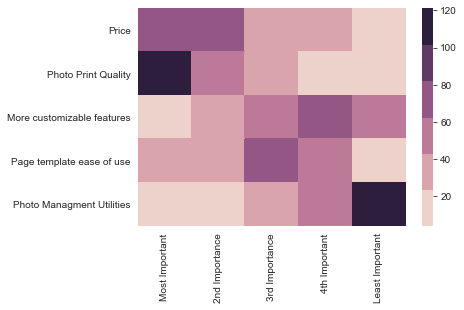

In [26]:
x_axis_labels = ['Most Important', '2nd Importance', '3rd Importance', '4th Important', 'Least Important'] # labels for x-axis
counts = Q7.apply(pd.Series.value_counts).T
ax = sns.heatmap(counts, cmap=sns.cubehelix_palette(), xticklabels=x_axis_labels)

# Q8 - If you made a photobook, what would you do with it?

In [27]:
interested.Q4 = interested.Q4.str.replace(': \(please explain\)', '')
interested.Q4.value_counts().to_frame(questions['Q4'])

purposes = [
    'Display at home', 
    'Share with friends', 
    'Take out with me',
    'Other'
]
results = {}
for purpose in purposes:
    results[purpose] = len(interested[interested['Q8'].str.contains(purpose, na=False)])
    
purpose_count = pd.DataFrame(results.items(), columns=["purpose", "count"])
purpose_count

,purpose,count
0,Display at home,139
1,Share with friends,0
2,Take out with me,0
3,Other,34


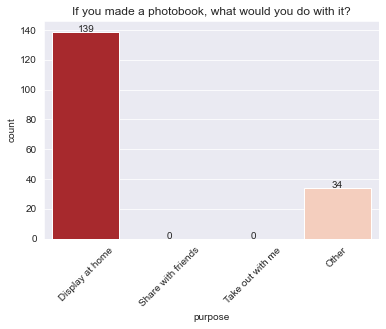

In [28]:
# ax = sns.barplot(x='count', y='purpose', data=purpose_count, orient='h')
ax = sns.barplot(
    x='purpose',
    y='count',
    data=purpose_count,
#     orient='v',
    palette="Reds_r",
)
ax.set_title(questions['Q8'])
ax.set_xticklabels([
    'Display at home', 
    'Share with friends', 
    'Take out with me',
    'Other'
], rotation=45)

show_values_on_bars(ax)

In [29]:
print(interested.Q8_4_TEXT.unique())

[nan 'Memory books ' 'Great gift for out of town grandparents!!'
 'My kids look at them almost daily!' 'I also make them yearly for gifts'
 'Give as a gift' 'Keepsake for children' 'As a gift'
 'Gifts; also part of my business to make books for others ' 'Gift'
 'Sell to customers ' 'Sell to clients' 'Family yearbooks for my kids. '
 'I make photo books for clients as well as for myself '
 'Gifts for family'
 'We use as a yearbook for our youth sports organization' 'Gift '
 'Gift to grandparents '
 'I like to make books for special trips, people, or memories for family or my son to remember'
 'Give as gifts to family' 'Gift for sister' 'All of the above' 'Gifts'
 'Send copies to grandparents' 'Gift to children (memory type book)'
 'Yearbook for homeschool' 'Would be nice if you could import a blog.'
 'Giveaway' 'Give as gifts' 'Gift to my kids’ grandparents ']


**Gift** comes up a lot

# Q9 - For page customization, which of the following options do you prefer the most?

In [30]:
prefer = interested.Q9.value_counts().to_frame('votes')
prefer

,votes
"Starting with pre-made templates, and modifying them",160
Selecting page designs from pre-made templates,33
Customizing your own page designs from scratch,26
Other: (please explain),3


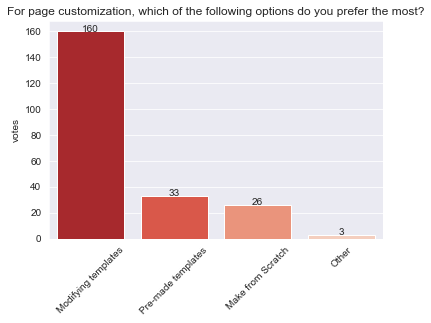

In [31]:
# ax = sns.barplot(x='votes', y=prefer.index, data=prefer, orient='h')

ax = sns.barplot(
    x=prefer.index,
    y='votes',
    data=prefer,
    palette="Reds_r",
)
ax.set_title(questions['Q9'])
ax.set_xticklabels([
    'Modifying templates', 
    'Pre-made templates', 
    'Make from Scratch',
    'Other'
], rotation=45)

show_values_on_bars(ax)

In [32]:
print(interested.Q9_4_TEXT.unique())

[nan 'I highly prefer to customize my own designs using InDesign. '
 'I usually design using outside software, then upload'
 'Something similar to Shutterfly calendar format.']


# Q10 - In your view, how many photos belong on a single page?

In [33]:
interested.Q10.value_counts().to_frame('pages')

pages = [
    '1 per page', 
    '1-5', 
    '6-10',
    '11-15',
    '15-20',
    '20+',
    
]
results = {}
for page in pages:
    results[page] = len(interested[interested['Q10'].str.contains(page, na=False)])
    
page_count = pd.DataFrame(results.items(), columns=["pages", "votes"])
page_count

,pages,votes
0,1 per page,19
1,1-5,203
2,6-10,26
3,11-15,1
4,15-20,1
5,20+,2


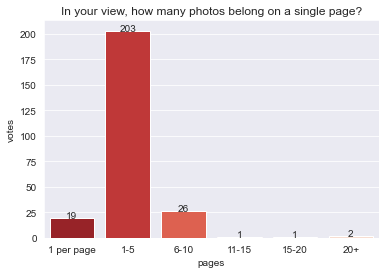

In [34]:
# ax = sns.barplot(x='votes', y='pages', data=page_count, orient='h')

ax = sns.barplot(
    x='pages',
    y='votes',
    data=page_count,
    palette="Reds_r",
)
ax.set_title(questions['Q10'])
# ax.set_xticklabels([
#     'Modifying templates', 
#     'Pre-made templates', 
#     'Make from Scratch',
#     'Other'
# ], rotation=45)

show_values_on_bars(ax)

# Q11 - Select the features that you might want in creating a photo book (check all that apply)

In [35]:
interested.Q11 = interested.Q11.str.replace(': \(please explain\)', '')
interested.Q11.value_counts().to_frame('features')

features = [
    'Page titles/headings', 
    'Photo captions', 
    'Custom text boxes/bubbles',
    'Colored/gradient page backgrounds',
    'Themed graphics, drawings, or clipart',
    'Images as page backgrounds',
    'Other'
]
results = {}
for feature in features:
    results[feature] = len(interested[interested['Q11'].str.contains(feature, na=False)])
    
feature_count = pd.DataFrame(results.items(), columns=["feature", "count"])
feature_count

,feature,count
0,Page titles/headings,128
1,Photo captions,157
2,Custom text boxes/bubbles,89
3,Colored/gradient page backgrounds,91
4,"Themed graphics, drawings, or clipart",71
5,Images as page backgrounds,102
6,Other,9


Text(0.5, 1.0, 'Which features might you want in creating a photo book')

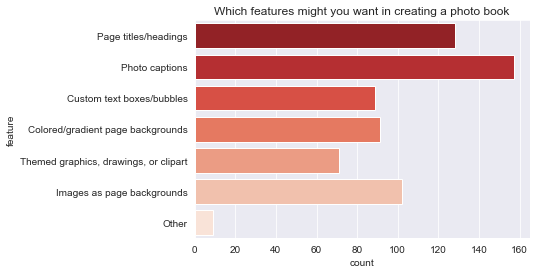

In [36]:
# ax = sns.barplot(x='count', y='feature', data=feature_count, orient='h')

ax = sns.barplot(
    x='count',
    y='feature',
    data=feature_count,
    orient='h',
    palette="Reds_r",
)
ax.set_title(questions['Q11'])
# ax.set_xticklabels([
#     'Modifying templates', 
#     'Pre-made templates', 
#     'Make from Scratch',
#     'Other'
# ], rotation=45)

# show_values_on_bars(ax)

In [37]:
print(interested.Q11_7_TEXT.unique())

[nan 'None '
 'Customization of front cover and binding, more full bleed template options for 1-3 photos (mirrored options of the existing full bleed templates)'
 'Full customization including full bleed pages and full spread images. '
 'Including quality extra pages for journaling and scrapbook style additions to the original book through the years'
 'Easy and accurate book spine design' 'Numbered pages'
 'I prefer simple Layouts and no graphics letting the photos speak for themselves '
 'Writing on the binding, more backgrounds to choose from'
 'Nothing. Whute background and photos only']


# Q12 - For what occasions would you most likely purchase a photobook? 

In [38]:
interested.Q12 = interested.Q12.str.replace(': \(please explain\)', '')
interested.Q12.value_counts().to_frame('occasions')

occasions = [
    'Wedding', 
    'Vacation', 
    'Year-end Recap',
    'Graduation',
    'Holidays',
]
results = {}
for occasion in occasions:
    results[occasion] = len(interested[interested['Q12'].str.contains(occasion, na=False)])
    
occasion_count = pd.DataFrame(results.items(), columns=["occasion", "count"])
occasion_count

,occasion,count
0,Wedding,99
1,Vacation,132
2,Year-end Recap,146
3,Graduation,45
4,Holidays,58


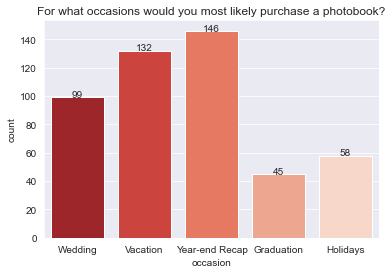

In [39]:
# ax = sns.barplot(x='count', y='occasion', data=occasion_count, orient='h')

ax = sns.barplot(
    y='count',
    x='occasion',
    data=occasion_count,
    palette="Reds_r",
    orient='v'
)
ax.set_title(questions['Q12'])
# ax.set_xticklabels([
#     'Modifying templates', 
#     'Pre-made templates', 
#     'Make from Scratch',
#     'Other'
# ], rotation=45)

show_values_on_bars(ax)

In [40]:
print(interested.Q12_6_TEXT.unique())

[nan 'Birthdays ' 'Personal Favorite Photos' 'Milestone birthdays '
 'Baby book' 'Yearly Professional Family Photos'
 'Family portrait sessions'
 'Commemorative moments; portraits; foster kiddos '
 'Legacy book, tell a specific story - past or recent '
 'Birthday milestones' 'Child milestones (first year)' 'Family photos'
 'Gift occasions ' 'Baby/family' 'Baby' 'Baby/kids' 'Family gifts'
 'New baby' 'Kids' 'Engagement photos '
 'Yearbook/Memory book for an organization' "Book of each child's life"
 'Friends / memories' 'Memorial. Kids. Family trips. ' 'Milestones'
 'Old family photos ' 'Baby Book' 'Baby book for each child'
 'Just because family photos.' 'Baby milestones' 'Birds Animals'
 "Themed album that isn't event related" 'Yearly book'
 'kids each year, family/anniversary books '
 'Special events, newborn session, family session' 'grandchildren'
 'Special occasions '
 'Specific photography hobbies like birding or lanscape, etc. ' 'Gifts'
 'Genealogy' 'Family pictures' 'Newborn ba

# Q13 - Please rate the following steps in creating a photobook in terms of your expected effort

In [41]:
Q13 = interested[['Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7']].rename(columns={
    'Q13_1': 'Choosing which photos to use',
    'Q13_2': 'The photo uploading process',
    'Q13_3': 'Writing your narrative',
    'Q13_4': 'Cropping and adjusting photo color',
    'Q13_5': 'Selecting the photobook material and dimensions',
    'Q13_6': 'Finding suitable page templates',
    'Q13_7': 'Customizing the page templates'
})

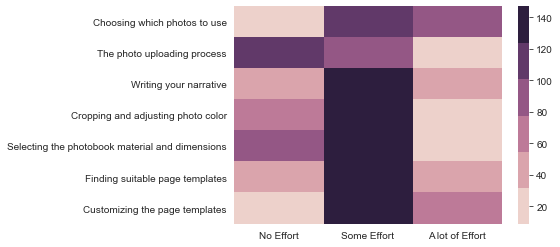

In [42]:
counts = Q13.apply(pd.Series.value_counts).T[['A lot of Effort', 'Some Effort', 'No Effort']]
ax = sns.heatmap(counts, cmap=sns.cubehelix_palette())
ax.invert_xaxis()

# Q14 - Please describe your most recent experience with making a photobook and what features affected your experience in a positive or negative way? Please list at least one thing that stood out to you.

In [43]:
import spacy
import os
nlp = spacy.load('en_core_web_sm')

In [44]:
all_words = interested.Q14.str.cat(sep=' ').lower()

In [45]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~‘’''' # list of special characters you want to exclude

sent_low_pnct = ""
for char in all_words:
    if char not in punctuations:
        sent_low_pnct = sent_low_pnct + char
sent_low_pnct = sent_low_pnct.replace(os.linesep, " ")

In [46]:
from spacy.lang.en.stop_words import STOP_WORDS
from collections import Counter
import matplotlib.pyplot as plt

In [47]:
words = sent_low_pnct.split()

words_nostop = list()

for word in words:
    if word not in STOP_WORDS:
        words_nostop.append(word)
        

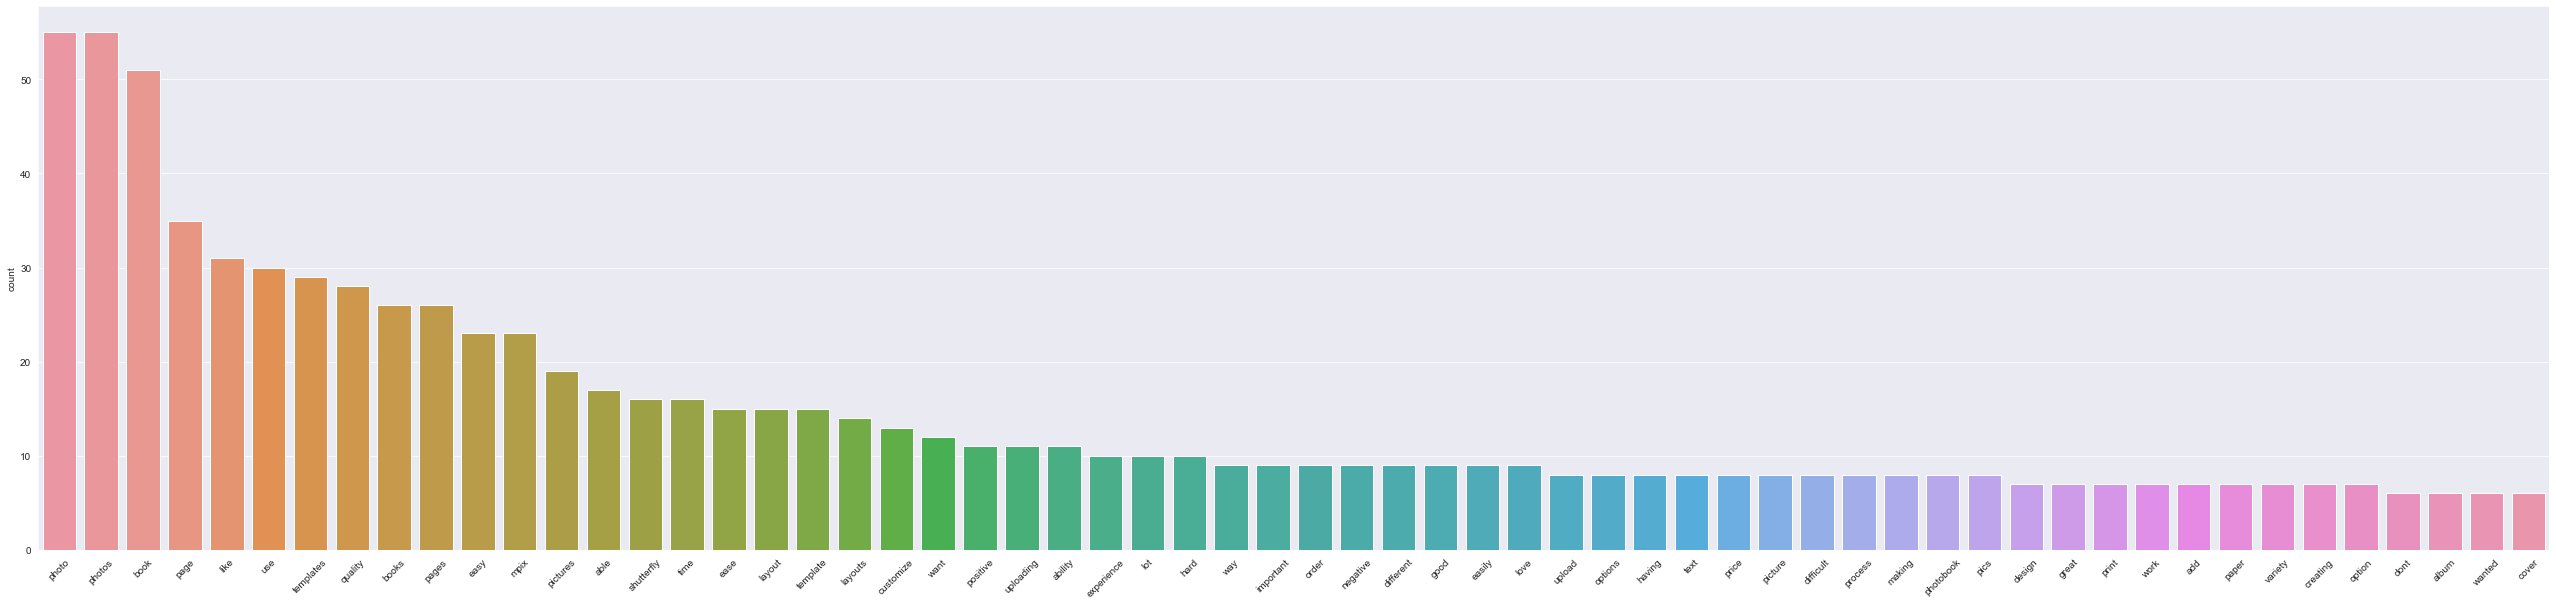

In [48]:
plt.figure(figsize=(45,10))
sns.countplot(x=words_nostop, order=pd.Series(words_nostop).value_counts().iloc[:60].index)
# sns.countplot(words_nostop, order=[counted[0] for counted in Counter(words_nostop).most_common()])
plt.xticks(rotation=45)
plt.show()

In [49]:
print(interested.Q14.dropna().sample(10))

46     I take too many pictures so it's hard to narro...
5      I recently put together an album with Shutterf...
13                     Uploading the photos was a pain. 
188    The ease/difficulty of uploading pics from my ...
130    Easy to upload photos and being able to drag a...
199    Made a mini album recently with a template. It...
205    Wedding photo book, quality of the binding, co...
134    I made a mini photobook. I liked that there wa...
187    Ease of adding photos from my phone was a posi...
47     Positive experience of creating photo books I ...
Name: Q14, dtype: object


# Q15 - Do you host any photos on any of the following cloud storage sites? (check all that apply)

In [50]:
interested.Q15 = interested.Q15.str.replace(': \(please explain\)', '')
interested.Q15.value_counts().to_frame('clouds')

clouds = [
    'Google Photos', 
    'iCloud', 
    'Other'
]
results = {}
for cloud in clouds:
    results[cloud] = len(interested[interested['Q15'].str.contains(cloud, na=False)])
    
cloud_count = pd.DataFrame(results.items(), columns=["cloud", "count"])
cloud_count

,cloud,count
0,Google Photos,125
1,iCloud,114
2,Other,50


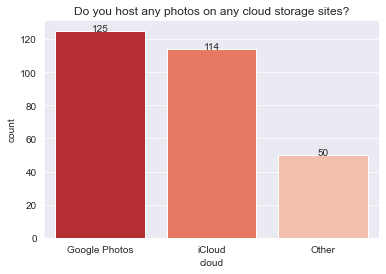

In [51]:
# ax = sns.barplot(x='count', y='cloud', data=cloud_count, orient='h')

ax = sns.barplot(
    y='count',
    x='cloud',
    data=cloud_count,
    palette="Reds_r",
    orient='v'
)
ax.set_title(questions['Q15'])


show_values_on_bars(ax)

In [52]:
print(interested.Q15_3_TEXT.unique())

[nan 'Shutterfly' 'Smugmug'
 'As a professional photographer I have client galleries on Pixieset currently. '
 'I use Cloudspot ' 'Amazon Photos' 'Amazon' 'Onedrive' 'Snapfish'
 'amazon prime photos' 'Dropbox ' 'Dropbox' 'amazon photo' 'Smugmug.com '
 'Amazon cloud' 'Amazon photos' 'Shutterfly ' 'No' 'External hard drive'
 'No. I use a photostick I bought on amazon to transfer my selected photos from phone to computer. I also connect my Camera to my computer to get those photos. '
 'Shutterfly, Amazon' 'Amazon,  Dropbox ' 'Amazon photo ' 'Verizon Cloud'
 'Crashplan ' 'Amazon Photos, Dropbox' 'I put them onto Mpix from my usb '
 'Amazon '
 'Shutterfly, have the app and they upload automatically from camera roll so they are already there when I want to print pics. '
 'None' 'Phone and Shutterfly ' 'Local NAS Synology storage'
 'Blogger Pro - blog']


**Highlighted** 

- Shutterfly, have the app and they upload automatically from camera roll so they are already there when I want to print pics.
- Amazon, Dropbox are common write-ins

# Q16 - If photo book vendors offered integrations with your cloud storage site, would you leverage it?

In [53]:
integrate = interested.Q16.value_counts().to_frame('integrate')
integrate

,integrate
Yes,146
No,72


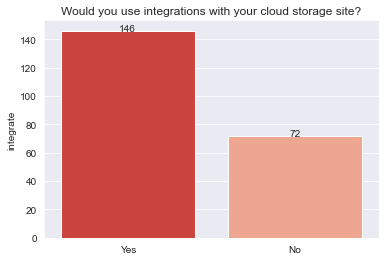

In [54]:
# ax = sns.barplot(x='integrate', y=integrate.index, data=integrate, orient='h')

ax = sns.barplot(
    y='integrate',
    x=integrate.index,
    data=integrate,
    palette="Reds_r",
    orient='v'
)
ax.set_title(questions['Q16'])


show_values_on_bars(ax)

# Q17 - Do you have any privacy concerns regarding uploading photos to a website to make photo books on?

In [55]:
concerns = interested.Q17.value_counts().to_frame('concerns')
concerns

,concerns
No,151
Yes,66
Other: (please explain),4


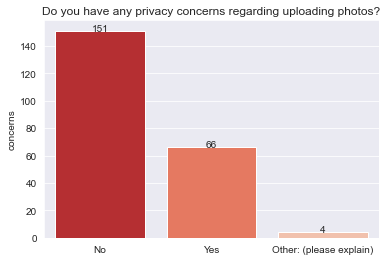

In [56]:
# ax = sns.barplot(x='concerns', y=concerns.index, data=concerns, orient='h')

ax = sns.barplot(
    y='concerns',
    x=concerns.index,
    data=concerns,
    palette="Reds_r",
    orient='v'
)
ax.set_title(questions['Q17'])


show_values_on_bars(ax)

In [57]:
cloud_integrations = interested[['Q16', 'Q17']]
cloud_integrations = cloud_integrations[cloud_integrations.Q17 != 'Other: (please explain)']
cloud_integrations['pairing'] = cloud_integrations['Q16'] + ' use - ' + cloud_integrations['Q17'] + ' concerns'
cloud_integrations.groupby('pairing').size()

pairing
No use - No concerns      52
No use - Yes concerns     18
Yes use - No concerns     97
Yes use - Yes concerns    47
dtype: int64